Code for Exploratory dataset analysis for Tiny ImageNet image dataset and dataset splitting into train test val is written below

Total Classes: 200
Total Training Images: 100000
Total Validation Images: 10000
Total Test Images: 10000


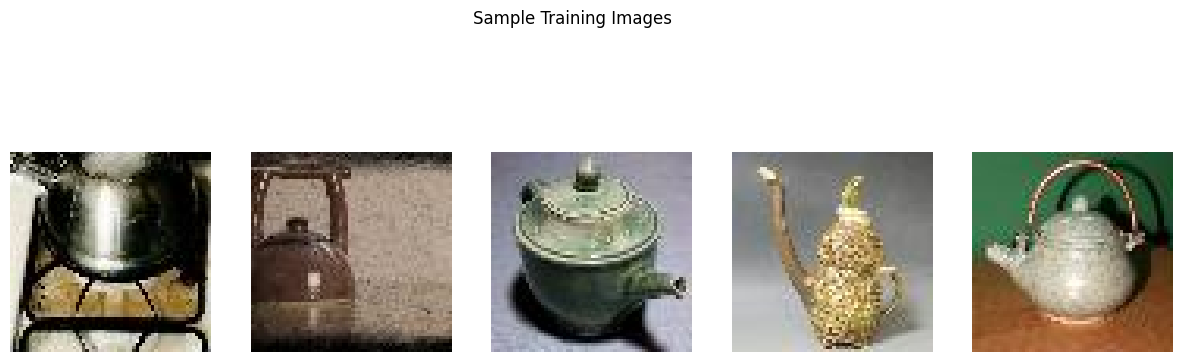

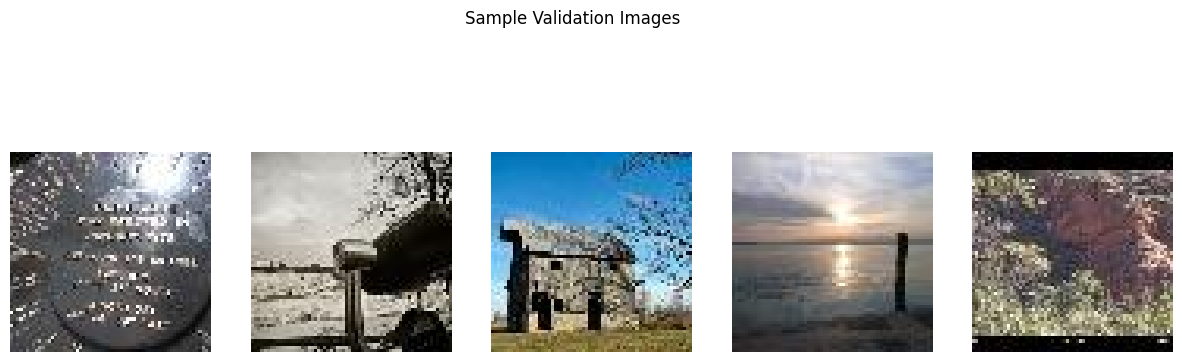

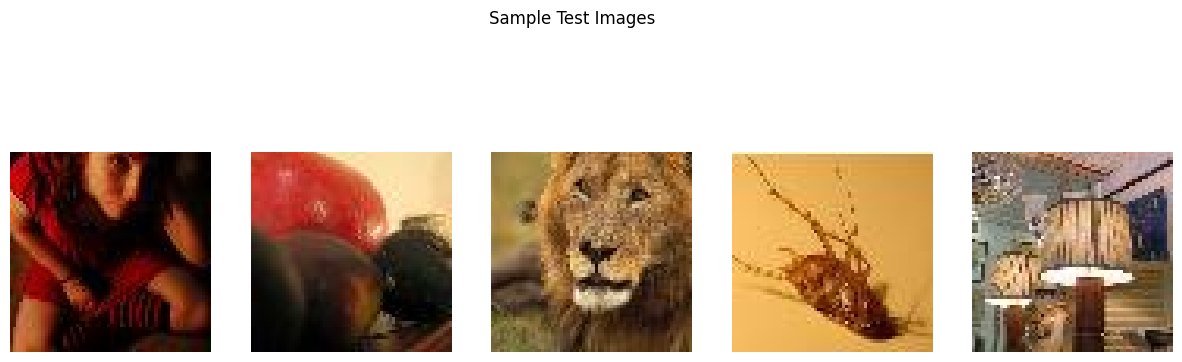

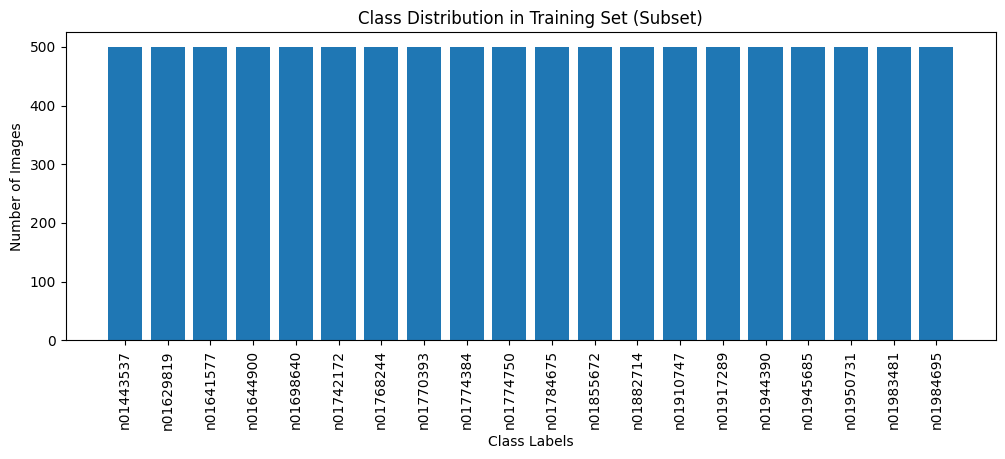

Sample Image Shape: (64, 64, 3)


In [7]:
import os
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
from collections import Counter

# dataset path
dataset_path = "tiny imagenet/tiny-imagenet-200"

train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val/images")
test_path = os.path.join(dataset_path, "test/images")
wnids_file = os.path.join(dataset_path, "wnids.txt")
with open(wnids_file, "r") as f:
    class_labels = [line.strip() for line in f.readlines()]

print(f"Total Classes: {len(class_labels)}")  # should be 200 just checking it

# 1️) checking the number of images in each split
train_counts = sum([len(os.listdir(os.path.join(train_path, cls, "images"))) for cls in os.listdir(train_path)])
val_counts = len(os.listdir(val_path))
test_counts = len(os.listdir(test_path))

print(f"Total Training Images: {train_counts}")
print(f"Total Validation Images: {val_counts}")
print(f"Total Test Images: {test_counts}")

# 2️) visualizing sample images
def show_random_images(dataset_dir, title, num_images=5):
    image_paths = []

    if "train" in dataset_dir:
        class_dirs = os.listdir(dataset_dir)
        random_class = random.choice(class_dirs)
        image_paths = [os.path.join(dataset_dir, random_class, "images", img) for img in os.listdir(os.path.join(dataset_dir, random_class, "images"))]
    
    else:
        image_paths = [os.path.join(dataset_dir, img) for img in os.listdir(dataset_dir)]

    selected_images = random.sample(image_paths, num_images)
    
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # converting BGR to RGB
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# showing images from each dataset
show_random_images(train_path, "Sample Training Images")
show_random_images(val_path, "Sample Validation Images")
show_random_images(test_path, "Sample Test Images")

# 3️) Checking class distribution in train set
class_distribution = {cls: len(os.listdir(os.path.join(train_path, cls, "images"))) for cls in os.listdir(train_path)}
plt.figure(figsize=(12, 4))
plt.bar(range(20), list(class_distribution.values())[:20])  # using first 20 class counts only
plt.xticks(ticks=range(20), labels=list(class_distribution.keys())[:20], rotation=90)

plt.xticks(rotation=90)
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Set (Subset)")
plt.show()

# 4️) checking image shape consistency
random_class = random.choice(os.listdir(train_path))
random_image_path = os.path.join(train_path, random_class, "images", random.choice(os.listdir(os.path.join(train_path, random_class, "images"))))

sample_img = cv2.imread(random_image_path)
print(f"Sample Image Shape: {sample_img.shape}")  # Should be (64, 64, 3)


Code for Exploratory dataset analysis for yahoo answers text dataset and its splitting into train test val is written below

Train Set Shape: (1400000, 5)
Test Set Shape: (60000, 5)
Train Set Missing Values:
 Class                    0
Question Title           0
Question Content    631689
Best Answer          24596
Class Label              0
dtype: int64
Test Set Missing Values:
 Class                   0
Question Title          0
Question Content    27106
Best Answer          1034
Class Label             0
dtype: int64


C:\Users\Brijesh Dixit\AppData\Local\Temp\ipykernel_133520\1544314770.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x="Class Label", order=class_labels, palette="viridis")


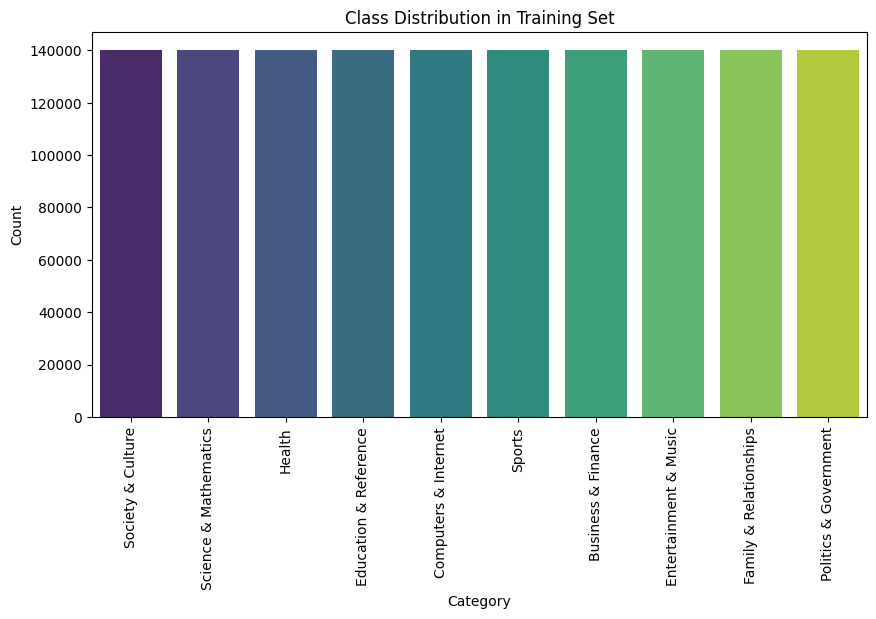

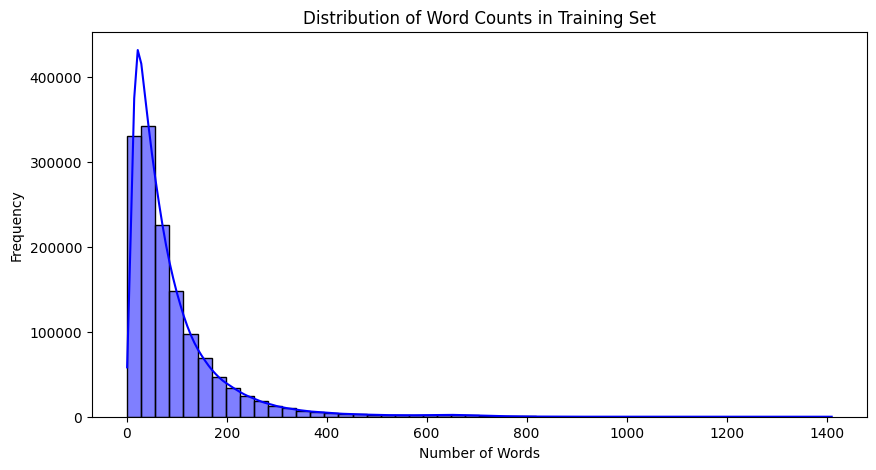

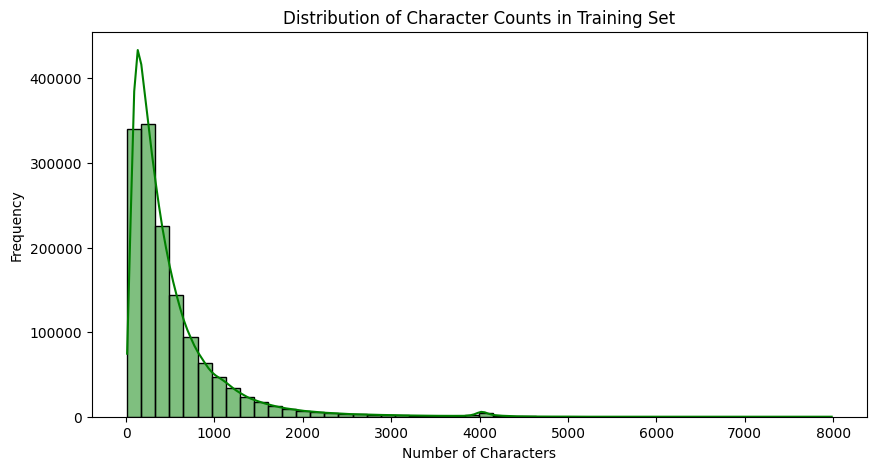


Sample Data:

Class: Computers & Internet
Question Title: why doesn't an optical mouse work on a glass table?
Question Content: or even on some surfaces?
Best Answer: Optical mice use an LED and a camera to rapidly capture images of the surface beneath the mouse.  The infomation from the camera is analyzed by a DSP (Digital Signal Processor) and used to detect imperfections in the underlying surface and determine motion. Some materials, such as glass, mirrors or other very shiny, uniform surfaces interfere with the ability of the DSP to accurately analyze the surface beneath the mouse.  \nSince glass is transparent and very uniform, the mouse is unable to pick up enough imperfections in the underlying surface to determine motion.  Mirrored surfaces are also a problem, since they constantly reflect back the same image, causing the DSP not to recognize motion properly. When the system is unable to see surface changes associated with movement, the mouse will not work properly.
----------

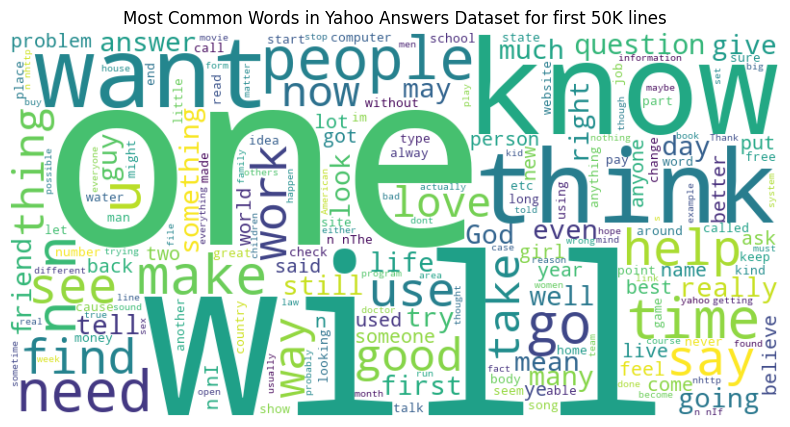

Validation set created and saved as val.csv


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# file paths
data_dir = "yahoo_answers_csv/yahoo_answers_csv" 
train_file = os.path.join(data_dir, "train.csv")
test_file = os.path.join(data_dir, "test.csv")
classes_file = os.path.join(data_dir, "classes.txt")
train_df = pd.read_csv(train_file, header=None, names=["Class", "Question Title", "Question Content", "Best Answer"])
test_df = pd.read_csv(test_file, header=None, names=["Class", "Question Title", "Question Content", "Best Answer"])

# loading class labels
with open(classes_file, "r") as f:
    class_labels = [line.strip() for line in f.readlines()]

# mapping them
train_df["Class Label"] = train_df["Class"].apply(lambda x: class_labels[x-1])
test_df["Class Label"] = test_df["Class"].apply(lambda x: class_labels[x-1])

### 1️) basic dataset info
print("Train Set Shape:", train_df.shape)
print("Test Set Shape:", test_df.shape)
print("Train Set Missing Values:\n", train_df.isnull().sum())
print("Test Set Missing Values:\n", test_df.isnull().sum())

### 2️) class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x="Class Label", order=class_labels, palette="viridis")
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Set")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### 3️) text length analysis
train_df["Text Length"] = train_df["Question Title"].fillna("") + " " + train_df["Question Content"].fillna("") + " " + train_df["Best Answer"].fillna("")
train_df["Word Count"] = train_df["Text Length"].apply(lambda x: len(x.split()))
train_df["Character Count"] = train_df["Text Length"].apply(len)

# plotting word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df["Word Count"], bins=50, kde=True, color="blue")
plt.title("Distribution of Word Counts in Training Set")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# plotting character count distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df["Character Count"], bins=50, kde=True, color="green")
plt.title("Distribution of Character Counts in Training Set")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

### 4️) sample texts
print("\nSample Data:\n")
for i in range(3):
    print(f"Class: {train_df.iloc[i]['Class Label']}")
    print(f"Question Title: {train_df.iloc[i]['Question Title']}")
    print(f"Question Content: {train_df.iloc[i]['Question Content']}")
    print(f"Best Answer: {train_df.iloc[i]['Best Answer']}")
    print("-" * 100)

### 5️) word cloud of most common words
sample_text = " ".join(train_df.sample(50000)["Text Length"].dropna())  # 50K rows only to make the code run faster. original file has 1.4 million
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(sample_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Yahoo Answers Dataset for first 50K lines")
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split

# load dataset
train_df = pd.read_csv("yahoo_answers_csv/yahoo_answers_csv/train.csv", header=None, names=["Class", "Question_Title", "Question_Content", "Best_Answer"])

# split into training (80%) and validation (20%)
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df["Class"])

# saving the new datasets that are created
train_data.to_csv("yahoo_answers_csv/yahoo_answers_csv/train_new.csv", index=False, header=False)
val_data.to_csv("yahoo_answers_csv/yahoo_answers_csv/val.csv", index=False, header=False)

print("Validation set created and saved as val.csv")



Code for Exploratory dataset analysis for FSDkaggle2018 audio dataset and splitting into train test val is written below

Train Dataset Info (First few lines of the .csv):
          fname         label  manually_verified  freesound_id   
0  00044347.wav        Hi-hat                  0         28739  \
1  001ca53d.wav     Saxophone                  1        358827   
2  002d256b.wav       Trumpet                  0         10897   
3  0033e230.wav  Glockenspiel                  1        325017   
4  00353774.wav         Cello                  1        195688   

              license  
0         Attribution  
1         Attribution  
2  Creative Commons 0  
3         Attribution  
4         Attribution   

Test Dataset Info (First few lines of the .csv):
          fname      label    usage  freesound_id             license
0  00326aa9.wav       Oboe  Private        355125         Attribution
1  0038a046.wav  Bass_drum  Private         90621  Creative Commons 0
2  007759c4.wav  Saxophone  Private         13406  Creative Commons 0
3  008afd93.wav  Saxophone  Private        358962         Attribution
4  00ae0

C:\Users\Brijesh Dixit\AppData\Local\Temp\ipykernel_133520\1918337656.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df["label"], order=train_df["label"].value_counts().index, palette="viridis")


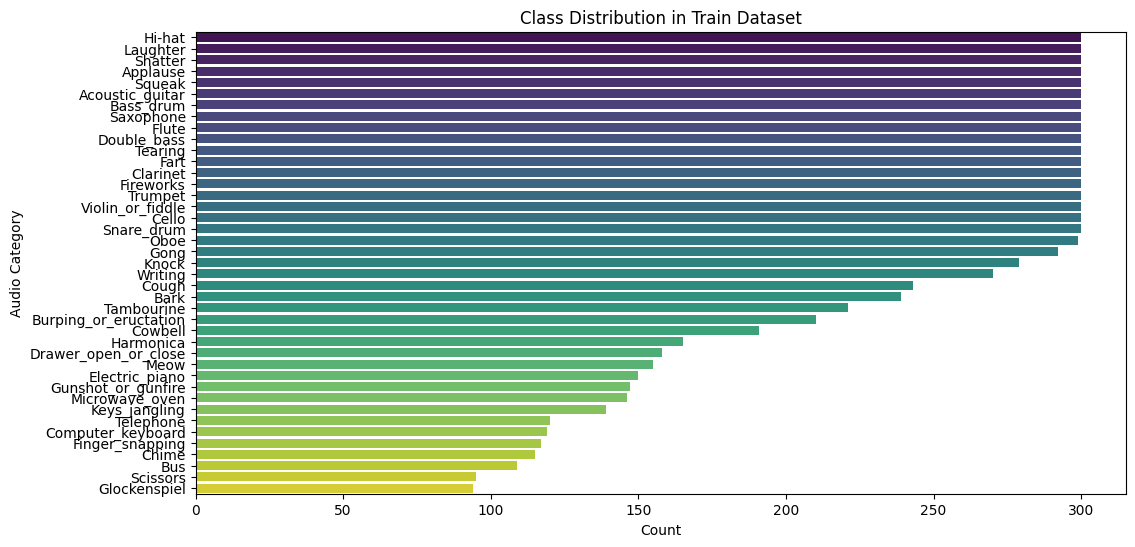

Missing Train Audio Files: 0


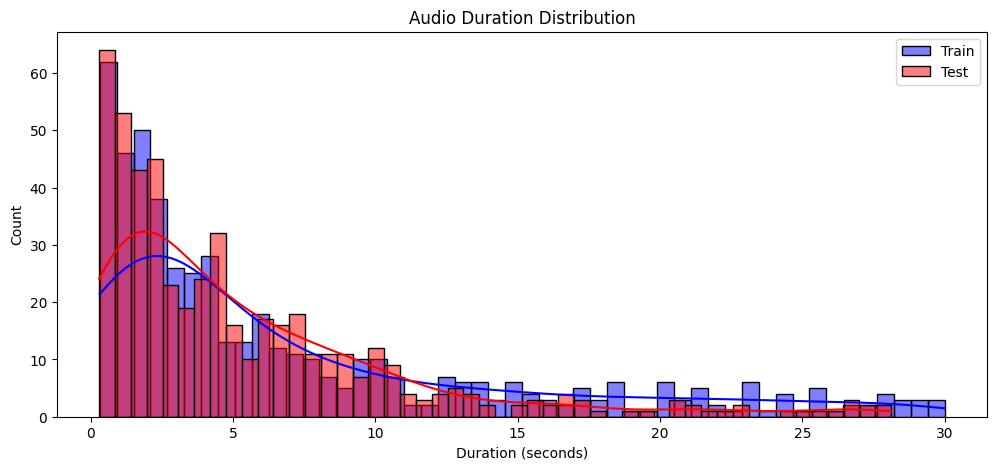

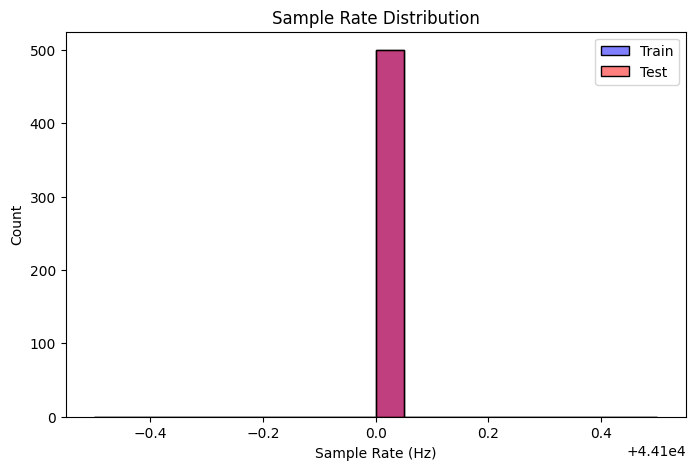

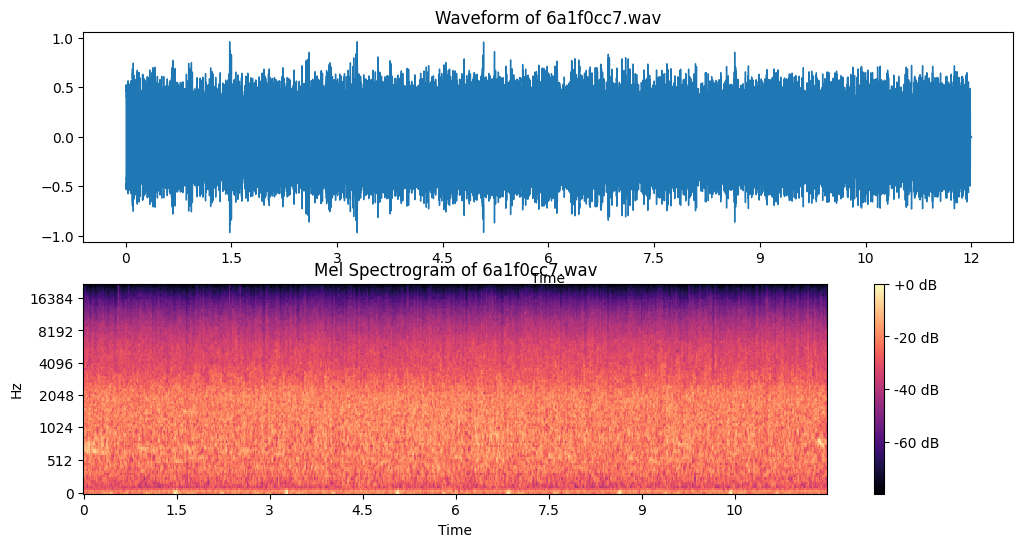

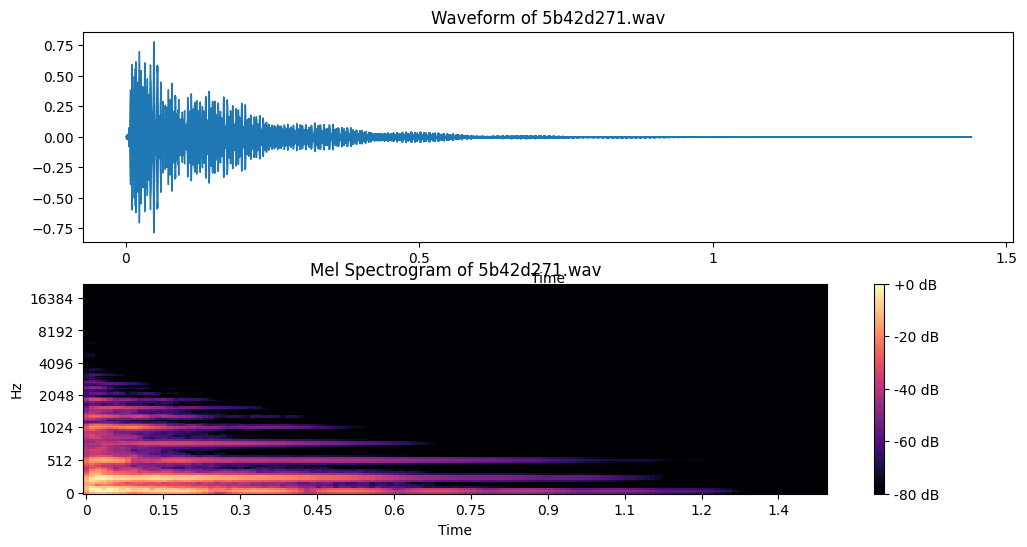

Train and validation sets created
Training audio files moved: 7578
Validation audio files moved: 1895


In [19]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# file paths
meta_path = "FSDKaggle2018.meta/FSDKaggle2018.meta/"
train_csv_path = os.path.join(meta_path, "train_post_competition.csv")
test_csv_path = os.path.join(meta_path, "test_post_competition_scoring_clips.csv")
train_audio_path = "FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/"
test_audio_path = "FSDKaggle2018.audio_test/FSDKaggle2018.audio_test/"

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# dataset info
print("Train Dataset Info (First few lines of the .csv):")
print(train_df.head(), "\n")
print("Test Dataset Info (First few lines of the .csv):")
print(test_df.head(), "\n")

# 1️) class distribution in train dataset
plt.figure(figsize=(12, 6))
sns.countplot(y=train_df["label"], order=train_df["label"].value_counts().index, palette="viridis")
plt.title("Class Distribution in Train Dataset")
plt.xlabel("Count")
plt.ylabel("Audio Category")
plt.show()

# 2️) checking if all audio files exist
missing_files = [fname for fname in train_df["fname"] if not os.path.exists(os.path.join(train_audio_path, fname))]
print(f"Missing Train Audio Files: {len(missing_files)}")

# 3️) audio duration and sampling rate analysis
def get_audio_stats(audio_path, file_list, num_samples=500):
    durations = []
    sample_rates = []
    
    for fname in np.random.choice(file_list, min(num_samples, len(file_list)), replace=False):
        filepath = os.path.join(audio_path, fname)
        try:
            y, sr = librosa.load(filepath, sr=None)  # loading with original sample rate
            durations.append(librosa.get_duration(y=y, sr=sr))
            sample_rates.append(sr)
        except Exception as e:
            print(f"Error loading {fname}: {e}")
    
    return durations, sample_rates

train_durations, train_sample_rates = get_audio_stats(train_audio_path, train_df["fname"])
test_durations, test_sample_rates = get_audio_stats(test_audio_path, test_df["fname"])

# 4️) plot audio duration distribution
plt.figure(figsize=(12, 5))
sns.histplot(train_durations, bins=50, kde=True, color="blue", label="Train")
sns.histplot(test_durations, bins=50, kde=True, color="red", label="Test")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Audio Duration Distribution")
plt.legend()
plt.show()

# 5️) plot sample rate distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_sample_rates, bins=20, kde=True, color="blue", label="Train")
sns.histplot(test_sample_rates, bins=20, kde=True, color="red", label="Test")
plt.xlabel("Sample Rate (Hz)")
plt.ylabel("Count")
plt.title("Sample Rate Distribution")
plt.legend()
plt.show()

# 6️) visualizing waveform and spectrogram for a random sample
def plot_waveform_and_spectrogram(audio_path, fname):
    filepath = os.path.join(audio_path, fname)
    y, sr = librosa.load(filepath, sr=None)
    plt.figure(figsize=(12, 6))
    # waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform of {fname}")
    # spectrogram
    plt.subplot(2, 1, 2)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, x_axis="time", y_axis="mel")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Mel Spectrogram of {fname}")
    
    plt.show()

# plot for a random train sample
random_sample = np.random.choice(train_df["fname"])
plot_waveform_and_spectrogram(train_audio_path, random_sample)

# plot for a random test sample
random_sample = np.random.choice(test_df["fname"])
plot_waveform_and_spectrogram(test_audio_path, random_sample)

import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

meta_folder = "FSDKaggle2018.meta/FSDKaggle2018.meta/"
original_train_audio_folder = "FSDKaggle2018.audio_train/FSDKaggle2018.audio_train/"
temp_train_audio_folder = "FSDKaggle2018.audio_train_temp/"
new_train_audio_folder = "FSDKaggle2018.audio_train_new/FSDKaggle2018.audio_train_new/"
val_audio_folder = "FSDKaggle2018.audio_val/FSDKaggle2018.audio_val/"

os.makedirs(temp_train_audio_folder, exist_ok=True)
os.makedirs(new_train_audio_folder, exist_ok=True)
os.makedirs(val_audio_folder, exist_ok=True)

for fname in os.listdir(original_train_audio_folder):
    src_path = os.path.join(original_train_audio_folder, fname)
    dest_path = os.path.join(temp_train_audio_folder, fname)
    if os.path.isfile(src_path):  
        shutil.copy(src_path, dest_path)

# loading dataset
train_df = pd.read_csv(os.path.join(meta_folder, "train_post_competition.csv"))

# splitting data (80% train, 20% val) with stratified sampling
train_set, val_set = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

# saving new train and validation metadata files
train_set.to_csv(os.path.join(meta_folder, "train_new.csv"), index=False)
val_set.to_csv(os.path.join(meta_folder, "val.csv"), index=False)

# function to move files from temp folder to train/val folders
def move_files(file_list, src_folder, dest_folder):
    for fname in file_list:
        src_path = os.path.join(src_folder, fname)
        dest_path = os.path.join(dest_folder, fname)
        if os.path.exists(src_path):  
            shutil.move(src_path, dest_path)  

move_files(train_set["fname"], temp_train_audio_folder, new_train_audio_folder)
move_files(val_set["fname"], temp_train_audio_folder, val_audio_folder)

shutil.rmtree(temp_train_audio_folder)

print("Train and validation sets created")
print(f"Training audio files moved: {len(os.listdir(new_train_audio_folder))}")
print(f"Validation audio files moved: {len(os.listdir(val_audio_folder))}")

